### import libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### define some helper functions and classes to be used later

In [2]:
def normalize(feature_df):
    """apply normalisation
    """
    x = feature_df.values
    x = StandardScaler().fit_transform(x)
    # check if it works
    print(np.mean(x), np.std(x))
    return x

def add_feature_label(nd_array):
    """add lables for each column
    """
    feat_cols = ['feature'+str(i) for i in range(nd_array.shape[1])]
    df = pd.DataFrame(nd_array,columns=feat_cols)
    print(df.tail())
    print(df)

class PCA_transform(object):
    """wraps PCA related operations
    """
    def __init__(self, n, data):
        """ specify parameters and data
        :n: the number of principal components to keep
        :data: the data to be applied PCA tranforms against.
        """
        self.n_components = n
        self.data = data
        self.pca = PCA(n_components=self.n_components)
        
    def do_transform(self):
        """ execute the PCA transform
        """
        principal_components = self.pca.fit_transform(self.data)
        columns = [ 'principal component '+str(i) for i in range(1, self.n_components+1)]
        self.principal_df = pd.DataFrame(data=principal_components, columns = columns)
        #print(principal_df.head())

    def show_principal_df(self):
        print(self.principal_df.head())
        
    def get_principal_df(self):
        return self.principal_df
    
    def print_variance(self):
        print('Explained variation per principal component: {}'.format(self.pca.explained_variance_ratio_))
        
        
def scatter_plot_for_two_classes(dataset_name, targets, data, label_df):
    """ A helper function to plot scatter points of two classes using the data
    """
    %matplotlib inline
    plt.figure()
    plt.figure(figsize=(10,10))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)
    plt.xlabel('Principal Component 1',fontsize=20)
    plt.ylabel('Principal Component 2',fontsize=20)
    plt.title("Principal Component Analysis of " + dataset_name +" Dataset",fontsize=20)
    colors = ['b', 'r']
    for target, color in zip(targets, colors):
        indicesToKeep = label_df == target
        plt.scatter(data.loc[indicesToKeep, 'principal component 1'],
                    data.loc[indicesToKeep, 'principal component 2'],
                    c = color, s = 50)
    plt.legend(targets,prop={'size': 15})

## The Wisconsin Diagnostic Breast Cancer (WDBC) dataset

### read feature dataframe and label data

In [3]:
wsbc_df = pd.read_csv('wdbc.data', header = None)
## add meaningful columns names
column_labels = ['patient_id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']
wsbc_df.columns = column_labels
wsbc_df['diagnosis'].replace('B', 'Benign', inplace=True)
wsbc_df['diagnosis'].replace('M', 'Malignant', inplace=True)

breast_feature_df = wsbc_df.iloc[:,2:]
breast_label_df = wsbc_df.iloc[:,1]

breast_feature_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
breast_label_df.head()

0    Malignant
1    Malignant
2    Malignant
3    Malignant
4    Malignant
Name: diagnosis, dtype: object

### normalization

In [5]:
normalized_breast_feature_df = normalize(breast_feature_df)

1.2487570048507913e-18 1.0


### PCA transform

In [6]:
breast_pca_transform = PCA_transform(2, normalized_breast_feature_df)
breast_pca_transform.do_transform()
breast_pca_transform.show_principal_df()

   principal component 1  principal component 2
0               9.192837               1.948583
1               2.387802              -3.768172
2               5.733896              -1.075174
3               7.122953              10.275589
4               3.935302              -1.948072


### show variance explained

In [7]:
breast_pca_transform.print_variance()

Explained variation per principal component: [0.44272026 0.18971182]


### plot

<Figure size 432x288 with 0 Axes>

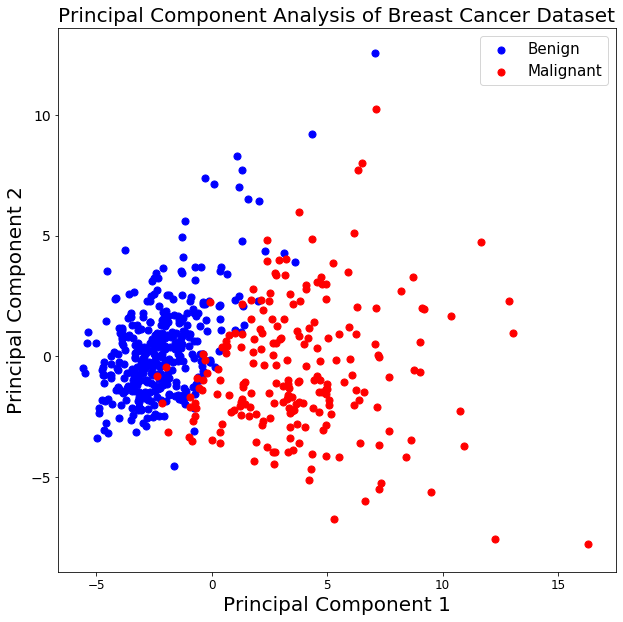

In [8]:
scatter_plot_for_two_classes('Breast Cancer', ['Benign', 'Malignant'], breast_pca_transform.get_principal_df(), breast_label_df)


# The Gisette dataset (train set)

### read feature dataframe and label data¶

In [10]:
## columns are seperated by white space
gisette_train_feature_df = pd.read_csv('gisette_train.data', header = None, delim_whitespace=True)
gisette_train_feature_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0


In [11]:
gisette_train_label_df = pd.read_csv('gisette_train.labels', header = None, delim_whitespace=True).iloc[:, 0]
gisette_train_label_df.head()


0    1
1   -1
2    1
3    1
4    1
Name: 0, dtype: int64

### normalization¶

In [12]:
normalized_gisette_train_feature_df = normalize(gisette_train_feature_df)

-2.17544500931884e-19 0.9954898291795854


### PCA transform

In [13]:
gisette_train_pca_transform = PCA_transform(2, normalized_gisette_train_feature_df)
gisette_train_pca_transform.do_transform()
gisette_train_pca_transform.show_principal_df()


   principal component 1  principal component 2
0              27.930749               6.382466
1              18.516359              -9.880740
2              10.245855             -13.196314
3              11.002967              -3.281869
4             -13.678263              -3.768910


### show variance explained¶

In [14]:
gisette_train_pca_transform.print_variance()

Explained variation per principal component: [0.02883488 0.02258951]


### plot

<Figure size 432x288 with 0 Axes>

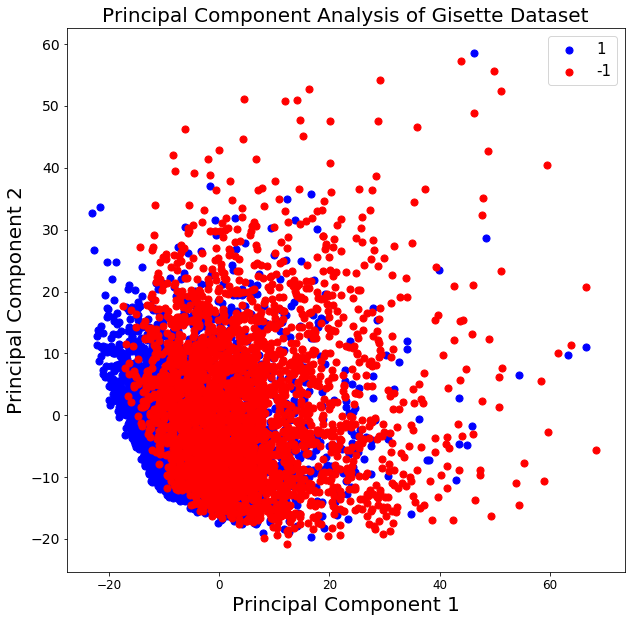

In [15]:
scatter_plot_for_two_classes('Gisette', [1, -1], gisette_train_pca_transform.get_principal_df(), gisette_train_label_df)


# The Gisette dataset (test set)¶

### read feature dataframe

In [16]:
## columns are seperated by white space
gisette_test_feature_df = pd.read_csv('gisette_test.data', header = None, delim_whitespace=True)
gisette_test_feature_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,983,0,956,0,0,0,0,520,0,0,...,0,0,0,968,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,695,...,960,0,0,687,0,0,0,0,0,0
2,0,0,703,0,0,0,0,0,0,0,...,0,0,0,758,0,0,983,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,987,0,0,0,0,0,498,0,0,0
4,0,0,0,0,0,0,0,980,0,976,...,0,0,0,0,0,0,0,0,0,0


### normalization¶

In [17]:
normalized_gisette_test_feature_df = normalize(gisette_test_feature_df)

-1.1379615198865605e-18 0.9955902771722902


### PCA transform

In [18]:
gisette_test_pca_transform = PCA_transform(2, normalized_gisette_test_feature_df)
gisette_test_pca_transform.do_transform()
gisette_test_pca_transform.show_principal_df()


   principal component 1  principal component 2
0               3.956703              -7.756697
1              10.608853              -5.958001
2              16.619442              19.958202
3             -15.936448              10.978918
4               5.309621              -1.499030


### show variance explained

In [19]:
gisette_test_pca_transform.print_variance()

Explained variation per principal component: [0.02863004 0.02264792]


### show data

In [20]:
gisette_test_pca_transform.get_principal_df()

,principal component 1,principal component 2
0,3.956703,-7.756697
1,10.608853,-5.958001
2,16.619442,19.958202
3,-15.936448,10.978918
4,5.309621,-1.499030
...,...,...
6495,13.060412,-11.590579
6496,16.865552,-9.418883
6497,-9.881430,-3.808588
6498,-4.282959,-2.090540


# The Gisette dataset (valid set)

### read feature dataframe

In [21]:
## columns are seperated by white space
gisette_valid_feature_df = pd.read_csv('gisette_valid.data', header = None, delim_whitespace=True)
gisette_valid_feature_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,688,0,0,0,0,0,0,952,0,870,...,0,0,0,0,0,0,494,0,769,0
1,778,758,0,0,0,0,0,708,0,991,...,0,0,0,770,0,0,0,0,0,0
2,469,0,816,0,0,0,0,0,0,0,...,0,0,0,467,0,0,0,417,0,0
3,0,0,0,0,0,571,991,983,0,983,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,949,0,991,...,0,0,0,0,0,0,0,0,976,0


### normalization

In [22]:
normalized_gisette_valid_feature_df = normalize(gisette_valid_feature_df)

-3.0482283364108297e-19 0.9709788875150683


### PCA transform

In [23]:
gisette_valid_pca_transform = PCA_transform(2, normalized_gisette_valid_feature_df)
gisette_valid_pca_transform.do_transform()
gisette_valid_pca_transform.show_principal_df()


   principal component 1  principal component 2
0              -1.080575              -7.158494
1              -8.934669              13.395428
2               2.131044              16.864697
3             -11.076602              -2.764267
4             -13.762784              -4.960269


### show variance explained

In [24]:
gisette_valid_pca_transform.print_variance()

Explained variation per principal component: [0.03160305 0.02579088]


### show data

In [25]:
gisette_valid_pca_transform.get_principal_df()

,principal component 1,principal component 2
0,-1.080575,-7.158494
1,-8.934669,13.395428
2,2.131044,16.864697
3,-11.076602,-2.764267
4,-13.762784,-4.960269
...,...,...
995,3.255058,-4.377888
996,16.633844,-7.142927
997,-2.803803,13.274580
998,-4.721919,-8.502246
